# **An Exploratory Analysis of Payroll and Overtime Trends in Louisville Metro Government**

# **Step4-Visualizations**
**Goal:** Visualization is to clearly illustrate how average annual salaries vary across departments and job titles over different calendar years. By visually comparing salary trends, the chart helps identify high-paying roles, department-wise differences, and year-wise salary growth or fluctuations. This visualization supports better understanding of compensation patterns, role hierarchy, and organizational salary structure.

In [1]:
import pandas as pd # Import pandas library for data manipulation and analysis
import numpy as np  # Import numpy library for numerical computations and handling NaN values

pd.set_option('display.max_columns',None) # Set pandas option to display all columns in the DataFrame output
pd.set_option('display.float_format','{:.2f}'.format) # Set pandas option to format floating-point numbers to two decimal places

In [2]:
print('Python libraries imported successfully')

Python libraries imported successfully


In [3]:
df = pd.read_csv('/content/Louisville_Metro_KY_-_Employee_Salary_Data (1).csv') # Load the employee salary dataset into a Pandas DataFrame
print('Employee salary dataset loaded successfully')

Employee salary dataset loaded successfully


In [4]:
df.shape # Display the number of rows and columns in the dataset

(40816, 11)

# **Required Libraries**
matplotlib is used for basic and customizable plots

seaborn provides enhanced statistical visualizations

In [5]:
import matplotlib.pyplot as plt # Import matplotlib pyplot module for creating visualizations
import seaborn as sns # Import seaborn library for advanced statistical data visualization


# **Year-wise Employee Count**

This univariate analysis visualizes the distribution of employees across different calendar years. The bar chart displays the number of employees recorded in each year, allowing a clear comparison of workforce size over time.



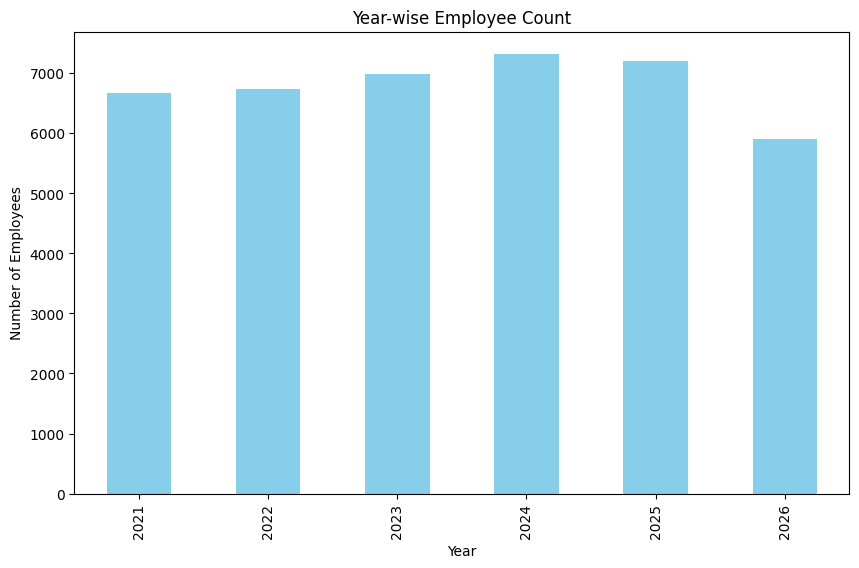

In [6]:
#Univariate analysis
year_counts = df['CalYear'].value_counts().sort_index()
year_counts.plot(kind="bar", color="skyblue", figsize=(10,6))
plt.title("Year-wise Employee Count")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.show()

# **Observation:**

**The bar chart shows the number of employees across the years 2021 to 2026.**

From 2021 to 2025, the bars are almost equal in height, indicating a stable workforce of around ,6500 employees. In 2026, however, the bar is noticeably shorter, reflecting a decline to about 6,000 employees.

# **Interpretation:**

This visualization highlights that the organization maintained a steady employee count for several years, but in 2026 there was a noticeable drop in headcount. The decline could be due to factors such as:

- **Attrition or retirements not replaced**

- **Incomplete reporting for 2026 data**





# **Top 10 Departments by Employee Count**

The bar chart visualizes the top 10 departments based on the number of employees. Each bar represents a department, with its length indicating the total employee count. The data was sorted in descending order to highlight departments with the largest workforce.

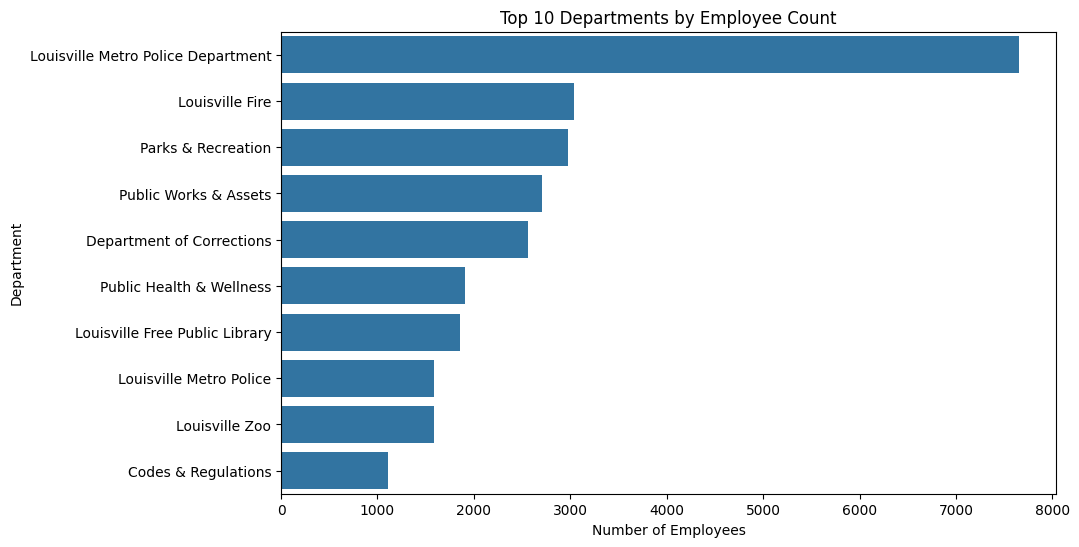

In [7]:
#Univariate analysis
dept_count = df['Department'].value_counts().reset_index()
dept_count.columns = ['Department', 'Employee_Count']
type(dept_count)
plt.figure(figsize=(10,6))
sns.barplot(
    x='Employee_Count',
    y='Department',
    data=dept_count.head(10)
)
plt.title('Top 10 Departments by Employee Count')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()

# **Observation**

The bar chart shows the top 10 departments ranked by employee count. The Louisville Metro Police Department has the largest workforce, followed by Louisville Fire, Parks & Recreation, and Public Works & Assets. Departments like Codes & Regulations and Louisville Zoo have comparatively fewer employees. The visualization highlights how staffing is distributed across major service areas.
# **Interpretation**

- **Public Safety Priority:**

The largest departments are police, fire, and corrections, indicating that public safety is the most resource‑intensive area.

- **Community Services:**

Parks & Recreation, Public Health & Wellness, and the Library also employ significant numbers, showing investment in community well‑being and public access services.

- **Specialized Departments:**

Smaller departments like Codes & Regulations and the Zoo reflect more specialized functions with limited staffing needs.

Overall, the chart suggests that workforce allocation is heavily concentrated in safety and essential services, while cultural and specialized services operate with leaner teams. This distribution provides insight into organizational priorities and resource planning.


# **Salary Range Distribution of Employees**
This bar chart shows how employees are distributed across different salary ranges. The Annual_Rate column was divided into five bins: Low (0–50k), Medium (50k–100k), High (100k–150k), Very High (150k–200k), and Extreme (200k and above). Each bar represents the number of employees falling into each salary category.

In [8]:
salary_bins = pd.cut(
    df['Annual_Rate'],
    bins=[0, 50000, 100000, 150000, 200000, df['Annual_Rate'].max()],
    labels=['Low', 'Medium', 'High', 'Very High', 'Extreme']
)


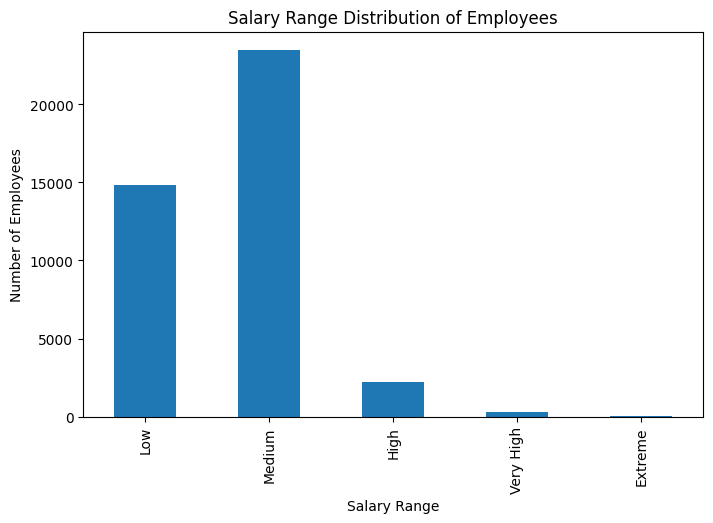

In [9]:
#Univariate analysis
salary_bins = pd.cut(
    df['Annual_Rate'],
    bins=[0, 50000, 100000, 150000, 200000, df['Annual_Rate'].max()],
    labels=['Low', 'Medium', 'High', 'Very High', 'Extreme']
)
plt.figure(figsize=(8,5))
salary_bins.value_counts().sort_index().plot(kind='bar')
plt.title('Salary Range Distribution of Employees')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')
plt.show()

# **Observation**

The bar chart titled “Salary Range Distribution of Employees” shows how employees are distributed across five salary categories: Low, Medium, High, Very High, and Extreme.
- **The Medium salary** range has the largest number of employees.
- **The Low salary** range comes next, with a significant portion of the workforce.
- **The High, Very High, and Extreme** ranges have far fewer employees, with numbers dropping sharply as salary levels increase.

# **Interpretation**

- **Workforce concentration:**

    Most employees fall into the Medium salary band, meaning the organization’s compensation structure is centered around mid‑level pay.

- **Entry‑level presence:**

    A considerable number of employees are in the Low salary range, likely representing entry‑level or support roles.

- **Limited high earners:**

    Only a small fraction of employees are in the High, Very High, and Extreme ranges, which typically correspond to senior management, specialized experts, or leadership positions.

- **Income disparity:**

    The chart highlights a clear imbalance — while the majority of employees earn within the medium range, only a select few reach the top salary brackets.


# **Salary Pattern Analysis**
This boxplot visualizes the distribution of employee salaries (Annual_Rate) and highlights potential outliers. The box represents the interquartile range (IQR), the line inside the box shows the median salary, and the whiskers indicate the typical salary range. Points outside the whiskers are considered outliers, showing unusually high or low salaries compared to the rest of the workforce.

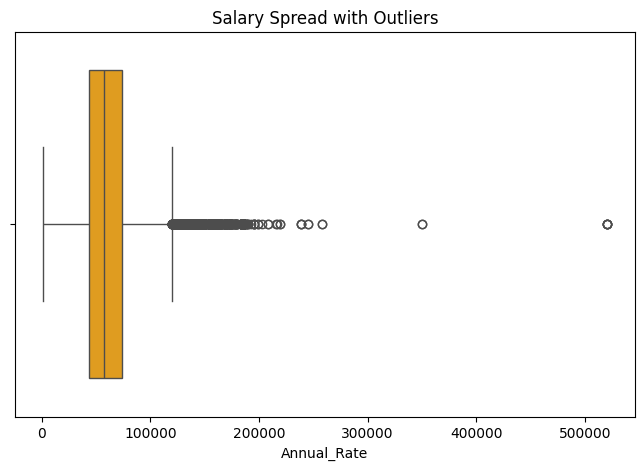

In [10]:
#Univariate analysis
#Distribution & outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Annual_Rate'], color="orange")
plt.title("Salary Spread with Outliers")
plt.show()

# **Observation**

The box plot titled “Salary spread with outliers” shows the distribution of annual salary rates.

- The **box** represents the interquartile range (middle 50% of salaries).
- The **whiskers** to the minimum and maximum values excluding outliers.
- Several individual points beyond the whiskers represent **outliers**, mostly on the higher end of the salary spectrum.
- The distribution appears **skewed**, with a long tail toward higher salaries.

Interpretation

- **Salary concentration:**

Most employees fall within a relatively narrow salary band (the box region), showing where the majority of compensation lies.

- **High‑end outliers:** The presence of many outliers on the upper side indicates that a small group of employees earn significantly more than the rest. These are likely senior executives, specialized professionals, or unique roles.

- **Skewness:** The skew toward higher salaries suggests inequality in pay distribution — while most employees earn within a mid‑range, a few earn disproportionately high salaries.

- **Workforce insight:** This pattern is common in large organizations, where the majority of staff are clustered in standard pay bands, but leadership and specialized positions push the upper limits.


# **Relationship Between Annual Rate and YTD Total**
The scatter plot illustrates the relationship between an employee’s Annual_Rate and their YTD_Total earnings. Each point represents an individual employee, with the x-axis showing the annual salary and the y-axis showing the total earnings accumulated year-to-date. This visualization helps in understanding how base salary contributes to overall earnings and highlights variations caused by overtime, incentives, and allowances

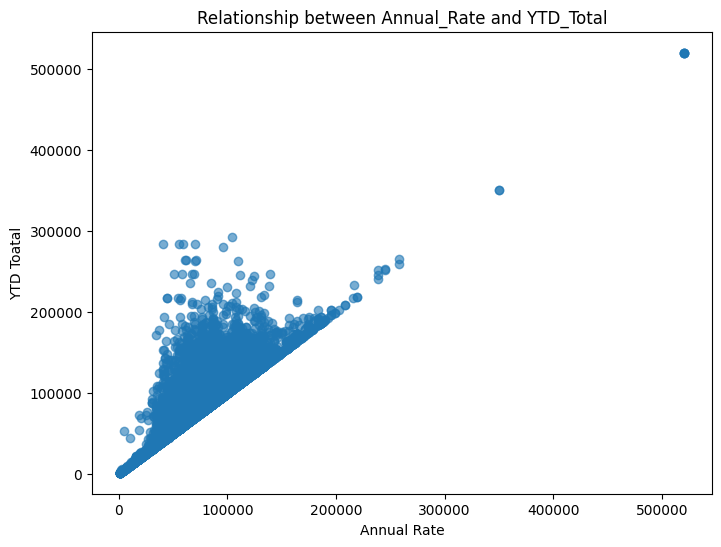

In [11]:
#Bivariate Analysis
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Rate'], df['YTD_Total'], alpha=0.6)
plt.title('Relationship between Annual_Rate and YTD_Total')
plt.xlabel('Annual Rate')
plt.ylabel('YTD Toatal')
plt.show()


# **Observation**
The scatter plot shows Annual Rate on the x‑axis and YTD Total on the y‑axis.

- Data points are densely clustered and form a triangular upward pattern.
- As the Annual Rate increases, the YTD Total also tends to increase.
- Most points lie close together, suggesting a consistent relationship, while a few points spread wider, indicating variation or possible outliers.

# **Interpretation**

- **Positive correlation:**

   There is a clear upward trend — higher annual salary rates are generally associated with higher year‑to‑date totals.

- **Predictive relationship:**

   The strong clustering implies that Annual Rate can be a good predictor of YTD Total.

- **Outliers:**

   Points that deviate from the triangular cluster may represent unusual cases (e.g., employees with high annual rates but lower YTD totals, or vice versa).

- **Organizational insight:**

   This pattern is typical in workforce data — base salary (Annual Rate) strongly influences total compensation, but allowances, overtime, or incentives can create exceptions.


# **Year-wise Average Annual Rate Variation**
This line chart shows the trend of average annual salary (Annual_Rate) across different calendar years. The data was grouped by CalYear, and the mean salary for each year was calculated to observe changes over time. Markers are used to clearly show year-to-year variations.



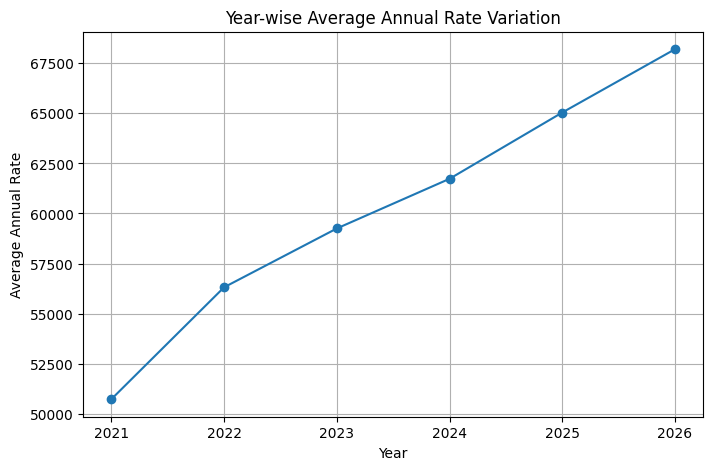

In [12]:
#Bivariate analysis
#Trend analysisimport matplotlib.pyplot as plt
year_avg = df.groupby('CalYear')['Annual_Rate'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(year_avg['CalYear'], year_avg['Annual_Rate'], marker='o')
plt.title('Year-wise Average Annual Rate Variation')
plt.xlabel('Year')
plt.ylabel('Average Annual Rate')
plt.grid(True)
plt.show()

# **Observation**
The line graph shows the trend of Average Annual Rate from **2021 to 2026.**

- The **x‑axis** represents Year **(2021–2026)**.
- The **y‑axis** represents Average Annual Rate, ranging from **50,000 to 67,500**.
- The **line consistently moves upward,** showing a steady increase each year.

# **Interpretation**

- **Positive growth:**
  The average annual rate has increased year after year, indicating consistent salary growth.

- **Organizational trend:**

  This suggests that the organization has been steadily raising compensation, possibly due to inflation adjustments, policy changes, or competitive pay strategies.

- **Forecasting potential:**

   Since the trend is smooth and upward, it can be used to forecast future salary averages beyond 2026.

- **Workforce impact:**

  Continuous salary growth can improve employee retention and satisfaction, but it also implies higher budget allocations for payroll.


# **Year-wise Total  Salary Trend**
This line chart shows the total annual salary expenditure for each calendar year. The data was grouped by year, and the sum of all annual salaries was plotted to visualize changes over time. An upward trend indicates increasing payroll, while dips or flat lines highlight years with lower total salaries. Peaks and declines may reflect staff additions, salary hikes, or budget adjustments.

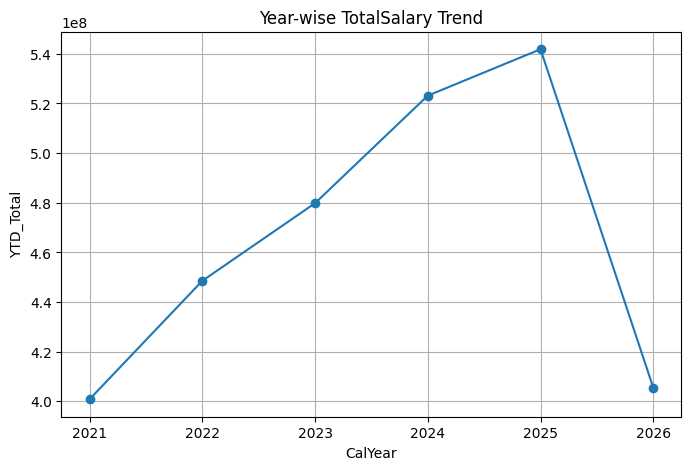

In [13]:
#Bivariate Analysis
#  Create year_salary
year_salary = (
    df.groupby('CalYear')['YTD_Total']
    .sum()
)

#  Plot line chart
plt.figure(figsize=(8,5))
plt.plot(
    year_salary.index,
    year_salary.values,
    marker='o'
)
plt.title('Year-wise TotalSalary Trend')
plt.xlabel('CalYear')
plt.ylabel('YTD_Total')
plt.grid(True)
plt.show()


# **Observation**
The line chart shows YTD_Total (Year‑to‑Date Total salary expenditure) across the years 2021 to 2026.

   • From **2021 to 2025,** there is a steady upward trend, with the total salary expenditure peaking in 2025.

   • In 2026, there is a sharp decline compared to the previous year.

   
# **Interpretation**

- **Growth phase (2021–2025):**

   The consistent rise indicates that salary expenditure was increasing year after year. This could be due to salary increments, workforce expansion, overtime payments, or allowances.

- **Peak in 2025:**
   The highest point suggests maximum payroll spending, possibly reflecting the largest workforce size or highest compensation adjustments.

- **Decline in 2026:**

  The sudden drop may be linked to workforce reduction (attrition not replaced, downsizing, restructuring), reduced incentives/allowances, or budget constraints.

# **Top 5 Departments by Average Annual Salary**


This pie chart displays the distribution of the average annual salary across the top five departments. The data was grouped by department, and the mean of the annual salary was calculated to identify departments with the highest average pay. Each slice represents a department’s share of the combined average salary of these top five departments, enabling a comparison of salary levels across departments.

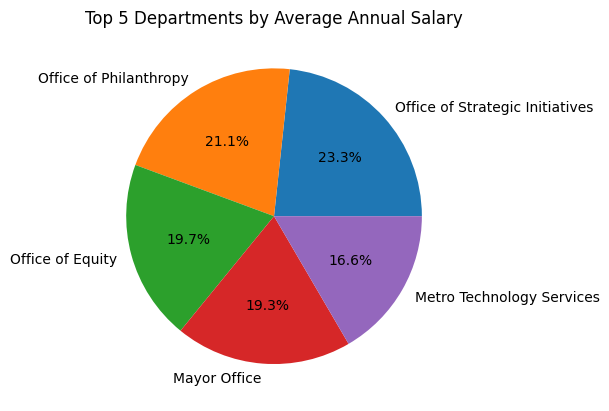

In [14]:
# Top 5 Departments by Average Annual Rate
top5_salary = df.groupby("Department")["Annual_Rate"].mean() \
                .sort_values(ascending=False) \
                .head(5) \
                .reset_index()



plt.pie(
    top5_salary["Annual_Rate"],
    labels=top5_salary["Department"],
    autopct="%1.1f%%"
)
plt.title("Top 5 Departments by Average Annual Salary")
plt.show()


# **Observation**

The pie chart shows the **Top 5 Departments by Average Annual Salary.**

- ** Office of Strategic Initiatives** has the largest share at **23.3%.**

- **Office of Philanthropy** follows with **21.1%.**

- **Office of Equity** accounts for **19.7%.**

- **Mayor Office** is close behind at **19.3%.**

- **Metro Technology Services** has the smallest share among the five, at **16.6%.**

# **Interpretation**

- **Strategic focus:**

 The Office of Strategic Initiatives leads in average salary, suggesting that strategic planning and high‑level project management are valued with higher compensation.

- **Philanthropy and Equity:**

 Both departments also command significant salary shares, reflecting the importance of social impact, equity, and external funding initiatives.

- **Leadership compensation:**

 The Mayor Office shows competitive average salaries, consistent with leadership and governance responsibilities.

- **Technology investment:**

 While Metro Technology Services has the lowest share among the five, its 16.6% still indicates strong compensation, highlighting the importance of technical expertise in modern governance.



# **Top 10 Departments by Average Hourly Rate**
This bar chart shows the top 10 departments by average hourly rate, calculated from annual salaries assuming a 40-hour work week. Each bar represents a department and its average hourly pay. The chart highlights which departments pay employees more per hour, not just in total annual salary. It also shows differences in pay efficiency across departments, helping identify high-paying areas.

In [15]:
# Create Hourly Rate from Annual Salary
df = df.copy()
df['Hourly_Rate'] = df['Annual_Rate'] / (52 * 40)

dept_hourly = (
    df.groupby('Department')['Hourly_Rate']
    .mean()
    .sort_values(ascending=False)
)

dept_hourly.head(10)


,Hourly_Rate
Department,
Office of Strategic Initiatives,60.86
Office of Philanthropy,55.01
Office of Equity,51.55
Mayor Office,50.44
Metro Technology Services,43.32
Office of Internal Audit,42.73
Economic Development,42.62
Office of Performance Improvement (inactive),41.76
Office of Sustainability,39.79


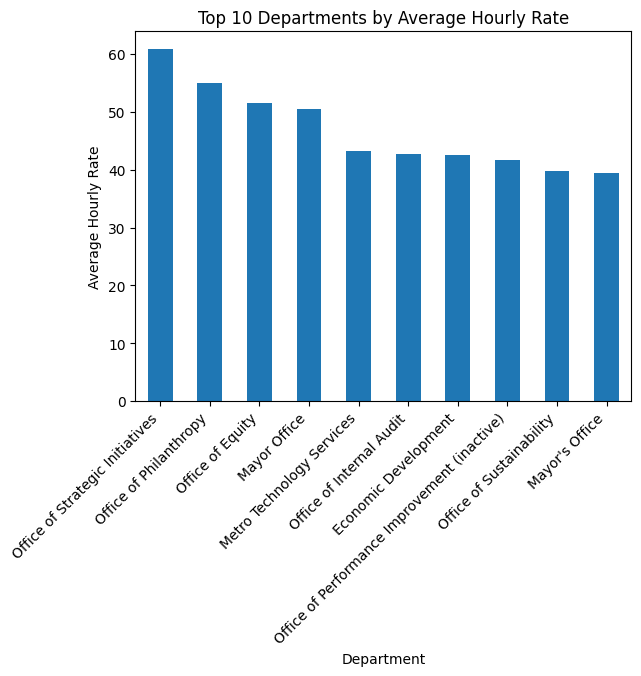

In [16]:
plt.figure()
dept_hourly.head(10).plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Hourly Rate')
plt.title('Top 10 Departments by Average Hourly Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Observation**

The bar chart shows the Average Hourly Rate across different departments.

- **Strategic Initiatives** has the highest average hourly rate.

- **Office of Philanthropy and Office of Equity** follow with relatively high rates.

- **Mayor Office and Mayor’s Office (duplicate category)**  how the lowest average hourly rates among the listed departments.

- **Other departments like Technology Services, Internal Audit, Development (inactive), and Sustainability** fall in the middle range.

# **Interpretation**

- **Strategic priority:**

  The highest hourly rate in Strategic Initiatives suggests that specialized planning and project management roles are compensated at a premium.

- **Social impact roles:**

  Philanthropy and Equity offices also receive strong hourly rates, reflecting organizational emphasis on community engagement and fairness.

- **Leadership vs. compensation:**

  Interestingly, the Mayor’s Office has the lowest hourly rate, which may indicate that leadership positions are salaried differently or structured in a way that lowers the hourly average.

- **Balanced technical and oversight roles:**

  Departments like Technology Services, Internal Audit, and Sustainability show moderate hourly rates, suggesting competitive but balanced pay for technical and compliance functions.


# **Job Title–wise Salary Distribution – Office of Strategic Initiatives**
This pie chart shows how total annual salary is distributed across different job titles within the Office of Strategic Initiatives. The data was filtered for the selected department and grouped by Job_Title, with annual salaries summed to represent each role’s contribution. Each slice indicates the proportion of total departmental salary allocated to a specific job title.

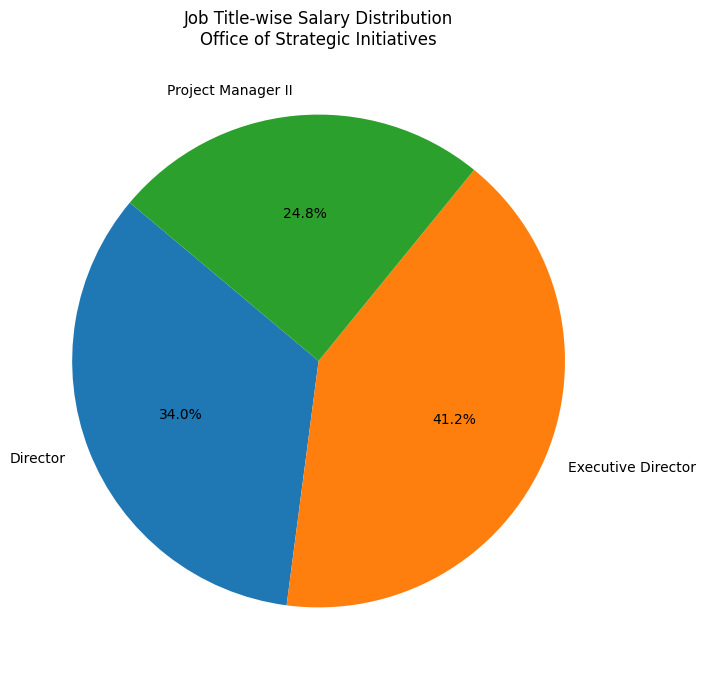

In [17]:
dept_data = df[df['Department'] == 'Office of Strategic Initiatives']

job_salary = (
    dept_data.groupby('Job_Title')['Annual_Rate']
    .sum()
    .reset_index()
)

plt.figure(figsize=(8,8))
plt.pie(
    job_salary['Annual_Rate'],
    labels=job_salary['Job_Title'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Job Title-wise Salary Distribution\nOffice of Strategic Initiatives')
plt.show()


# **Observations**

- The pie chart represents salary distribution for Project Manager II roles within the Office of Strategic Initiatives.

- **The distribution is divided into three segments:**

**41.3% —** largest share, indicating a significant portion of employees in the higher salary range.

**34.0%** — mid-range salaries.

**24.8%** — lowest share, representing employees in the lower salary range.

-The visualization highlights clear differences in how salaries are spread across this job title.

# **Overall Interpretation**

- The majority of Project Manager II employees fall into the **higher salary (41.3%)** , suggesting that this role is often compensated at a relatively elevated level.

- A substantial portion **(34.0%)** is in the **middle salary range**, showing a balanced layer of mid-level compensation.

- A smaller group **(24.8%)** is in the **lower salary range**, which could represent entry-level employees or those with less experience.


# **Relationship Between Annual Salary and Hourly Rate**
This scatter plot illustrates the relationship between employees’ annual salary and their hourly rate. Each point represents an individual employee, with the annual salary shown on the x-axis and the hourly rate on the y-axis. The plot helps in identifying patterns, trends, or correlations between annual pay and hourly compensation.

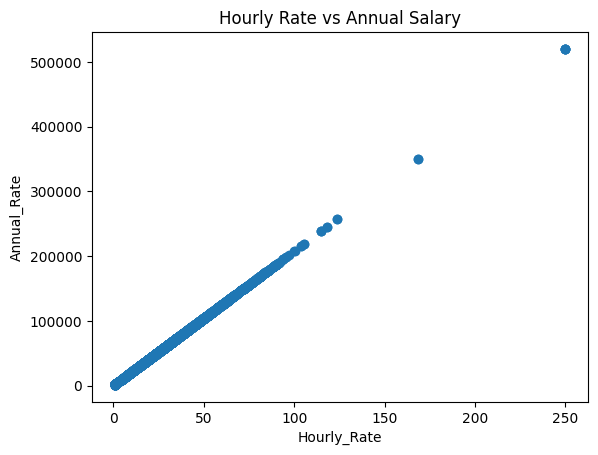

In [18]:
plt.figure()
plt.scatter(df['Hourly_Rate'], df['Annual_Rate'])
plt.xlabel('Hourly_Rate')
plt.ylabel('Annual_Rate')
plt.title('Hourly Rate vs Annual Salary')
plt.show()

# **Observation**

- The scatter plot shows the relationship between Hourly Rate (x-axis) and Annual Rate (y-axis).

- Data points form a linear pattern, indicating a strong positive correlation — as hourly rates increase, annual salaries also rise.

- A few outliers appear at higher values, but the overall trend remains consistent.

# **Overall Interpretation**

- The positive correlation suggests that the organization maintains a proportional pay structure:


- This alignment indicates a standardized and equitable compensation system, ensuring fairness across different roles.

- The presence of outliers may represent specialized or senior-level positions with exceptional pay packages, standing apart from the general trend.



# **Top 5 Departments by Average Overtime Rate**
This horizontal bar chart displays the top 5 departments with the highest average overtime rates. The data was grouped by department, and the mean overtime rate was calculated for each department. The departments are sorted in descending order, with the highest overtime rates shown at the top for easy comparison.

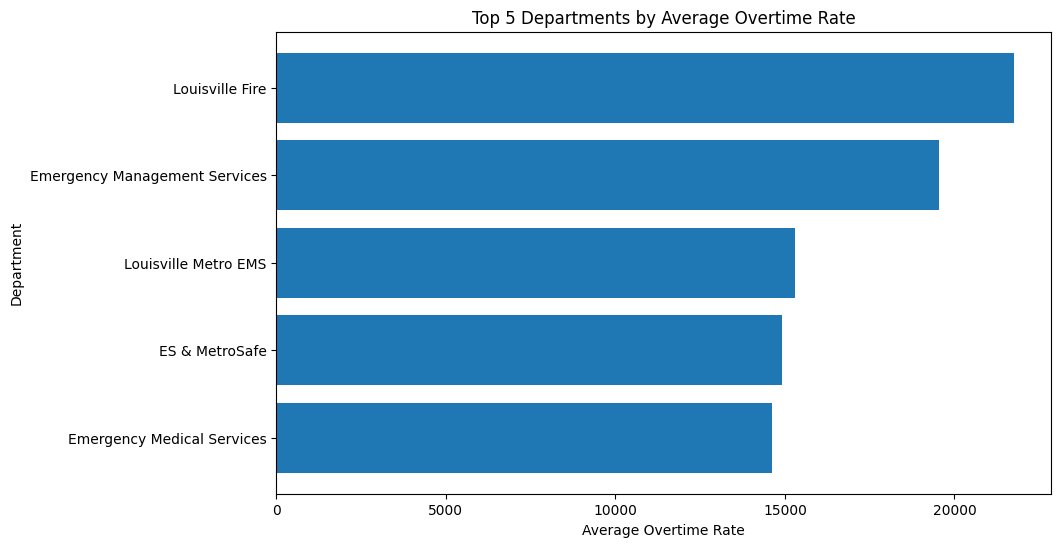

In [19]:
# Department-wise average overtime rate
dept_ot_rate = (
    df.groupby('Department')['Overtime_Rate']
    .mean()
    .reset_index()
)

top_5_high_ot = (
    dept_ot_rate
    .sort_values(by='Overtime_Rate', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

plt.figure(figsize=(10,6))
plt.barh(
    top_5_high_ot['Department'],
    top_5_high_ot['Overtime_Rate']
)
plt.xlabel('Average Overtime Rate')
plt.ylabel('Department')
plt.title('Top 5 Departments by Average Overtime Rate')
plt.gca().invert_yaxis()
plt.show()

# **Observation**

- Louisville Fire has the highest average overtime rate.

- Emergency Management Services and Louisville Metro EMS follow closely, also showing high overtime reliance.

- ES & MetroSafe appears next, with a slightly lower but still significant overtime rate.

- The visualization highlights that emergency and public safety departments dominate overtime usage compared to others.

# **Overall Interpretation**

- Emergency and safety services naturally show higher overtime rates due to the unpredictable and demanding nature of their work.

- **The heavy reliance on overtime suggests:**

- Operational intensity — frequent emergencies and extended duty hours.

- Staffing challenges — departments may be under-resourced, requiring employees to work beyond standard schedules.

- Budget impact — overtime costs likely form a substantial portion of departmental expenditures.

- **From an organizational perspective:**

- Louisville Fire stands out as the most overtime-heavy department, reflecting the critical nature of fire services.

- EMS and MetroSafe also show strong overtime reliance, underscoring the importance of emergency preparedness and public safety.

- These insights point to the need for strategic workforce planning — possibly through additional hiring, resource reallocation, or policy adjustments to reduce dependency on overtime.


# **Annual Salary Distribution by Department (Top 10 Highest Salary Departments)**

This pie chart shows how the total annual salary expenditure is distributed among the ten departments with the highest overall annual salaries. The data was grouped by department and the total annual salary was calculated using the sum of the annual rates. The chart highlights the relative contribution of each top department to the total salary budget, making it easier to identify departments with the greatest payroll impact.

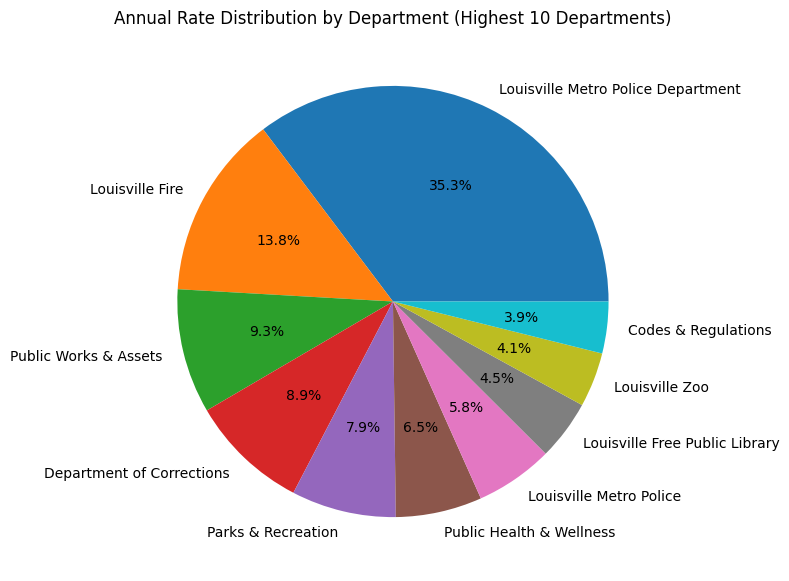

In [20]:
# Bivariate analysis – Highest 10 Departments by Annual Rate
top10_dept = (
    df.groupby('Department')['Annual_Rate']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(7,7))

top10_dept.plot(
    kind='pie',
    autopct='%1.1f%%'
)

plt.ylabel("")
plt.title("Annual Rate Distribution by Department (Highest 10 Departments)")
plt.show()


# **Observation**

- **Louisville Metro Police** Department holds the largest share at **35.3%**, indicating a significant portion of salary allocation.

- **Louisville Fire follows** with **13.8%**, while **Public Works & Assets (9.3%), **Department of Corrections (8.9%)**, **Parks & Recreation (7.9%)**, and **Public Health & Wellness (6.5%)** form the mid-range categories.

- **Smaller** shares are seen in **Louisville Free Public Library (4.5%)**, **Louisville Zoo (4.1%)**, and **Codes & Regulations (3.9%)**.

# **Overall Interpretation**

- **The Police Department** dominates salary distribution, reflecting the organization’s strong emphasis on **law enforcement and public safety.**

- **The Fire Department and Public Works** also receive substantial allocations, highlighting priorities in **emergency response and infrastructure maintenance.**

- **Corrections, Parks, and Public Health**  occupy mid-level shares, showing balanced but secondary importance in workforce and budget allocation.

- **Community and cultural services**  such as the Library, Zoo, and Codes & Regulations receive smaller shares, suggesting they are considered **supportive or secondary priorities** compared to safety and infrastructure.

- **Overall, the chart reveals a resource concentration in public safety and emergency services**, while **community-oriented departments** receive comparatively less funding.



# **Annual Rate Distribution by Department (Lowest 10 Departments)**

This pie chart represents the distribution of total annual salary expenditure among the ten departments with the lowest overall annual salaries. The data was grouped by department and the annual rates were summed to calculate total salary expenditure. Each slice shows the percentage contribution of a department to the combined salary of these lowest-paying departments, helping to understand how payroll costs are distributed at the lower end of the spectrum.

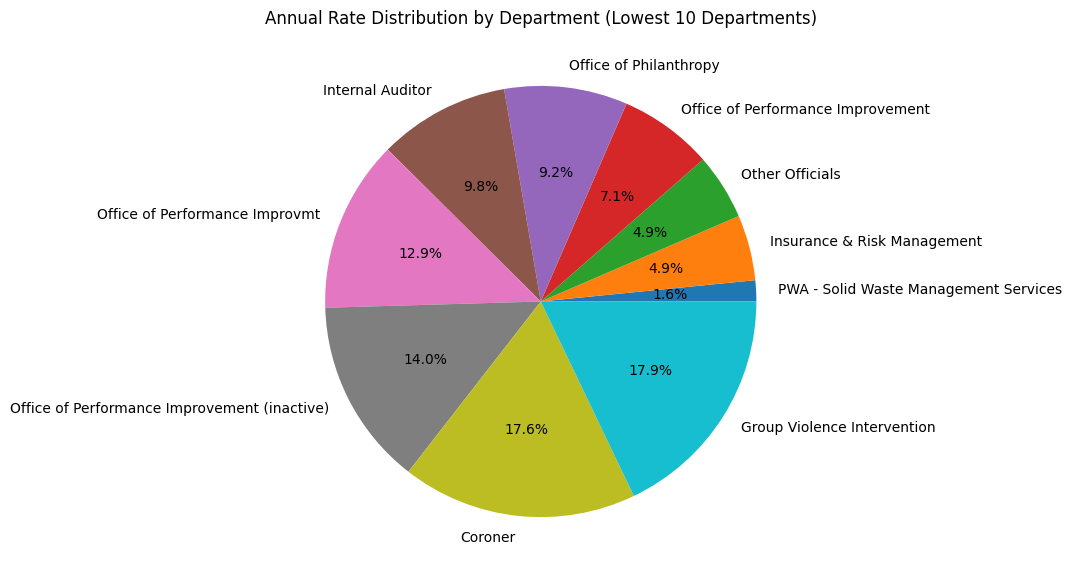

In [21]:
# Bivariate analysis – Lowest 10 Departments by Annual Rate
last10_dept = (
    df.groupby('Department')['Annual_Rate']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

plt.figure(figsize=(7,7))

last10_dept.plot(
    kind='pie',
    autopct='%1.1f%%'
)

plt.ylabel("")
plt.title("Annual Rate Distribution by Department (Lowest 10 Departments)")
plt.show()


# **Observation**


- ** Group Violence Intervention**  holds the largest share at **17.9%.**

- **corner** follows closely with **17.6%**.

- **Office of Performance Improvement** (inactive) (14.0%) and **Office of Performance Improvmt** (12.9%) also occupy significant portions.

- **Office of Performance Improvement** (7.1%), **Office of Philanthropy** (9.2%), and **Internal Auditor** (9.8%) form the mid-range categories.

- Smaller shares are seen in **Insurance & Risk Management** (4.9%), **Other Officials** (4.9%), and **PWA - Solid Waste Management Services** (1.6%).

# **Overall Interpretation**

- The distribution highlights that **specialized offices and initiatives** (Group Violence Intervention, Performance Improvement) dominate the lower-tier departments in terms of annual rate allocation.

- The relatively high shares for **Performance Improvement offices** (active, inactive, and variations) suggest overlapping or duplicated structures, which may indicate inefficiencies or legacy programs still consuming resources.

- **Community-focused roles** such as Philanthropy and Internal Audit receive moderate allocations, reflecting balanced but secondary importance.

- **Insurance & Risk Management, Other Officials, and Solid Waste Management Services** have the smallest shares, showing limited resource allocation compared to other departments.

- Organizationally, this distribution suggests:

- **Targeted investment in intervention and improvement programs**, even among lower-tier departments.

- Potential need for **streamlining duplicated offices** to optimize resource use.
- **Equity considerations** for smaller departments that may be underfunded relative to their responsibilities.



# **Top 10 Departments by Total Payroll Expenditure**
This bar chart presents the total annual payroll expenditure across different departments. The data was grouped by department, and the annual salary amounts were summed to calculate total payroll costs. The chart focuses on the top ten departments with the highest salary expenditure, allowing for a clear comparison of payroll spending among departments.

Top 10 Departments by Total Payroll Expenditure:
Department
Louisville Metro Police Department   575394440.14
Louisville Fire                      225197807.64
Public Works & Assets                152297935.97
Department of Corrections            145646114.44
Parks & Recreation                   128039512.05
Public Health & Wellness             105526184.85
Louisville Metro Police               95366611.60
Louisville Free Public Library        73302045.58
Louisville Zoo                        66801930.13
Codes & Regulations                   63246026.40
Name: Annual_Rate, dtype: float64


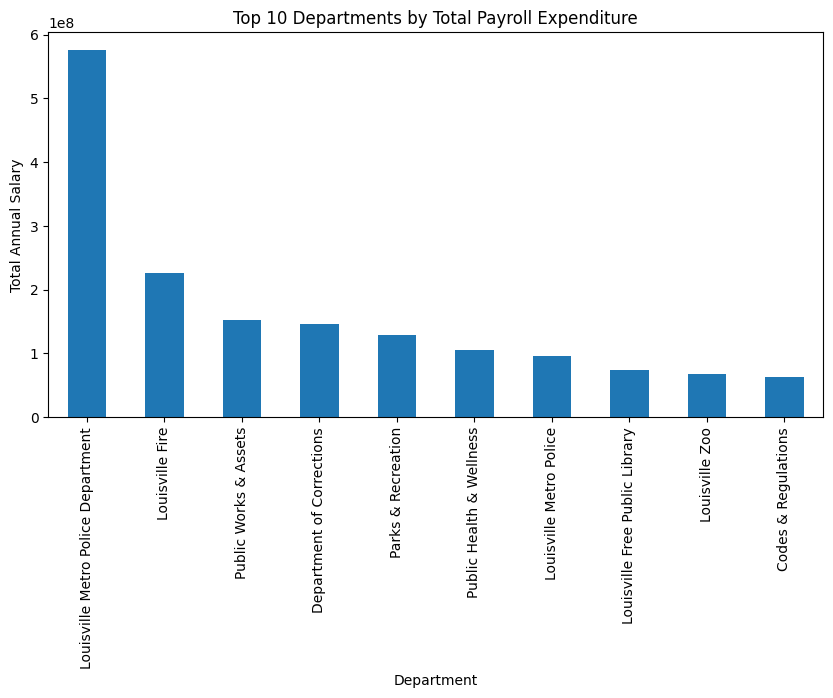

In [22]:
# Total Payroll Expenditure by Department
top_payroll_dept = df.groupby("Department")["Annual_Rate"].sum() \
                     .sort_values(ascending=False) \
                     .head(10)

print("Top 10 Departments by Total Payroll Expenditure:")
print(top_payroll_dept)

import matplotlib.pyplot as plt

top_payroll_dept.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Departments by Total Payroll Expenditure")
plt.xlabel("Department")
plt.ylabel("Total Annual Salary")
plt.show()


# **Observation**

- **Metro Police Department** has the highest total annual salary, standing out significantly compared to other departments.

- **Louisville Fire** follows as the second highest.

- **Public Works & Assets, Department of Corrections, and Parks & Recreation** occupy the mid-range positions.

- **Public Health & Wellness** also shows a notable allocation but lower than the top three.

- **Smaller totals are seen in Louisville Free Public Library, Louisville Zoo, and Codes & Regulations**, which have the lowest salary expenditures among the listed departments

# **Overall Interpretation**

- The dominance of the **Police Department** in salary expenditure reflects the city’s prioritization of **law enforcement and public safety**, which often require large workforces and higher compensation budgets.

- **Fire Department** also receives substantial funding, underscoring the importance of emergency response services.

- **Public Works, Corrections, and Parks & Recreation** represent essential operational and community services, receiving moderate allocations that balance infrastructure, safety, and public amenities.

- **Public Health & Wellness** shows investment in community health, though at a lower scale compared to safety-focused departments.

- **Library, Zoo, and Codes & Regulations** receive smaller shares, highlighting their supportive or cultural role within the city’s overall budget priorities.



# **Highest Paid Job Titles Based on Average Annual Salary**
This bar chart illustrates the top ten job titles with the highest average annual salaries. The data was grouped by job title, and the mean annual salary was calculated to determine average pay levels. The horizontal bar chart allows for easy comparison of salary differences across job roles, highlighting positions with the highest compensation.

Top 10 Job Roles by Average Annual Salary:
Job_Title
Police Chief                                    239264.09
Deputy Mayor - Chief of Staff General Counsel   192616.77
Chief Information Officer                       190008.00
LEDA Administrator                              189750.00
Deputy Police Chief                             176008.62
Inspector General                               173789.63
Fire Chief                                      172625.20
Deputy Chief of Staff-Mayor's Office            171706.56
Chief of Staff-General Counsel                  165126.00
Asst Police Chief - Lt Colonel                  164703.43
Name: Annual_Rate, dtype: float64


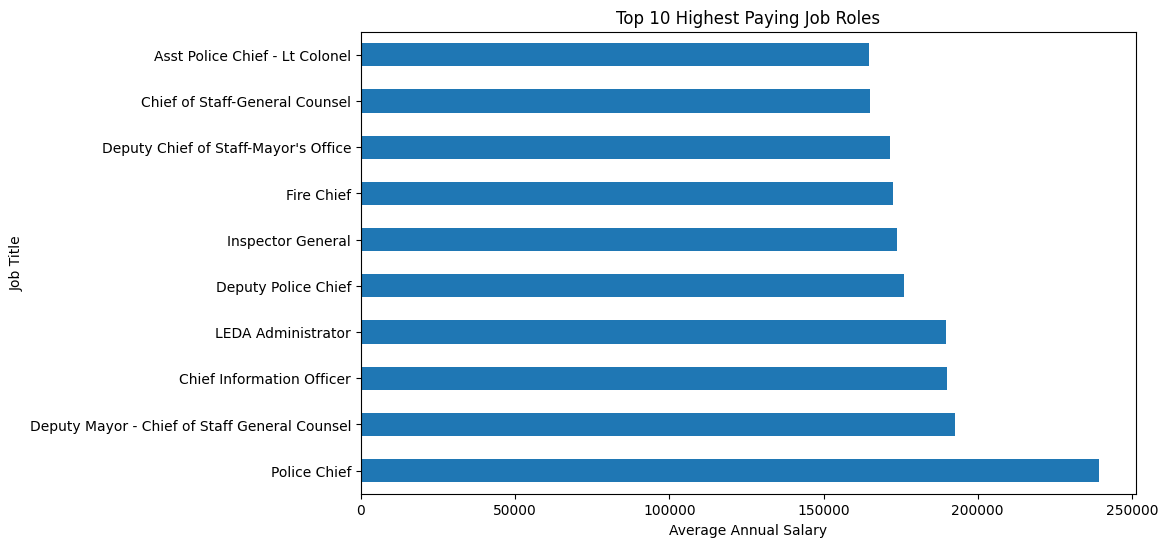

In [23]:
#Top 10 Highest Paid Job Titles
top_job_roles = df.groupby("Job_Title")["Annual_Rate"].mean() \
                  .sort_values(ascending=False) \
                  .head(10)

print("Top 10 Job Roles by Average Annual Salary:")
print(top_job_roles)

# Visualization
top_job_roles.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Highest Paying Job Roles")
plt.xlabel("Average Annual Salary")
plt.ylabel("Job Title")
plt.show()


# **Observation**

- **Police Chief** has the highest average annual salary at **239,264.09**.

- Other high-paying roles include **Deputy Mayor - Chief of Staff General Counsel (192,616.77), Chief Information Officer (190,000.00), and LEDA Administrator (189,750.00).**

- Senior leadership positions such as **Deputy Police Chief, Inspector General, Fire Chief, and Deputy Chief of Staff-Mayor’s Office** also appear in the top 10, with salaries ranging between 164,703.43 and 176,008.62.

- The visualization highlights that **executive and specialized leadership roles** dominate the highest salary brackets.

# **Overall Interpretation**

- **The Police Chief** role stands out as the most highly compensated, reflecting the critical importance of law enforcement leadership.

- **Deputy Mayor and Chief of Staff** roles also command high salaries, underscoring the value placed on executive decision-making and governance.

- **Technology leadership (Chief Information Officer) and administrative oversight (LEDA Administrator, Inspector General)** are compensated at premium levels, showing organizational emphasis on modernization, accountability, and strategic development.

- **Emergency leadership roles** such as the Fire Chief and Deputy Police Chief are also well-paid, aligning with the high responsibility and risk associated with public safety.

- Overall, the chart demonstrates that **top-tier salaries are concentrated in law enforcement, executive governance, and specialized oversight roles**, reflecting organizational priorities in safety, leadership, and accountability.



# **Comparison of Job Titles with Lowest Average Pay**
This visualization shows the top 10 job titles with the lowest average annual salary. The data was grouped by Job Title, and the mean of Annual_Rate was calculated for each role. These values were then sorted in ascending order to identify the lowest-paying positions. A horizontal bar chart is used to improve readability of job title names.

Lowest 10 Job Roles by Average Annual Salary:
Job_Title
Ex Officio Librarian-Law Libr             1300.00
Fire Settlement                           2080.00
Constable                                 2600.00
Comm Hlth Services Clerk - BX             7165.60
Community Health Services Clerk - BX      7672.50
Human Relations Clerk                     8679.84
Recreation Worker P/T-P/U                12173.20
Community Health Nurse Specialist - BX   12528.45
Library Page L/U                         12694.20
Zoo Service Clerk/ZU                     13419.12
Name: Annual_Rate, dtype: float64


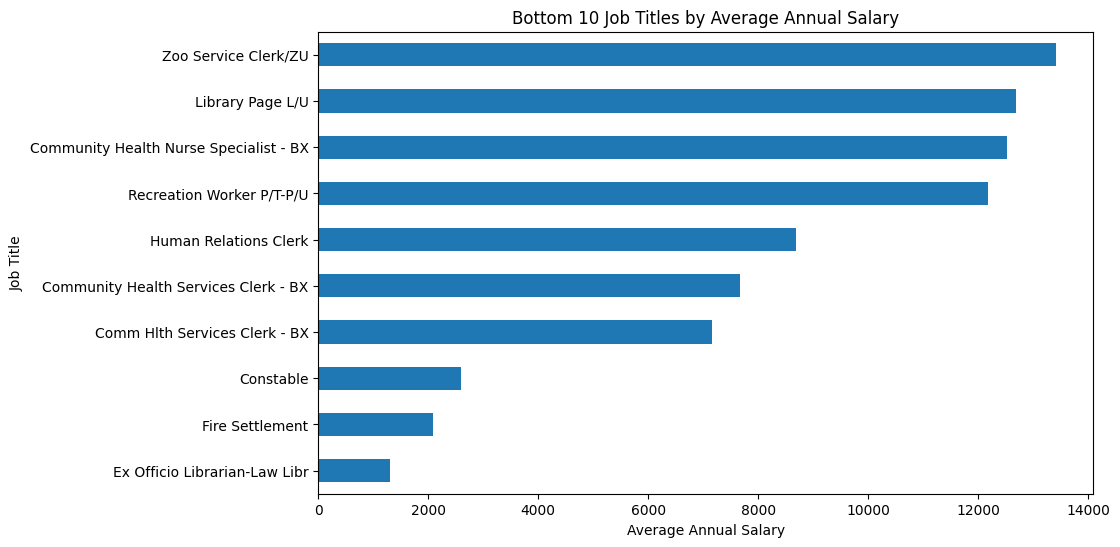

In [24]:
# Lowest 10 Job Titles by Average Annual Salary
lowest_job_roles = (
    df.groupby("Job_Title")["Annual_Rate"]
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

print("Lowest 10 Job Roles by Average Annual Salary:")
print(lowest_job_roles)

# Visualization
import matplotlib.pyplot as plt

lowest_job_roles.plot(kind="barh", figsize=(10,6))
plt.title("Bottom 10 Job Titles by Average Annual Salary")
plt.xlabel("Average Annual Salary")
plt.ylabel("Job Title")
plt.show()


**Observation**

- **Ex Officio Librarian-Law Libr** has the lowest salary at **1,300.00.**

- Other very low-paying roles include **Fire Settlement (2,080.00) and Constable (2,600.00).**

- Clerical and support positions such as **Community Health Services Clerk (7,165.60–7,672.50), Human Relations Clerk (8,679.84), and Recreation Worker P/T-P/U (12,173.20) fall in the lower range.**

- Slightly higher salaries are seen in C**ommunity Health Nurse Specialist (12,528.45), Library Page (12,694.20), and Zoo Service Clerk (13,419.12)**.

# **Overall Interpretation**

- The lowest-paying roles are primarily **part-time, clerical, or support positions**, reflecting limited responsibilities and reduced working hours.

- **Specialized community health roles** (e.g., Nurse Specialist) earn slightly more, but still remain in the lower tier compared to professional or leadership positions.

- **Cultural and service-oriented roles(Library Page, Zoo Clerk)** are also among the lowest, suggesting that community enrichment positions are not compensated at the same level as safety or executive roles.

- **Organizationally, this distribution highlights:**

- A clear **salary disparity** between executive/leadership positions and entry-level/community service roles.

- The need for **equity considerations**, especially for roles that provide essential but undervalued services (e.g., health clerks, library staff).

- Potential workforce challenges in **retention and motivation** for employees in these lowest-paying categories.


# **Correlation Heatmap of Salary Variables**
This multivariate analysis uses a correlation heatmap to examine the relationships between key salary-related variables: Annual_Rate, Regular_Rate, Overtime_Rate, and YTD_Total. Correlation coefficients range from –1 to +1, where values closer to +1 indicate a strong positive relationship. The heatmap visually represents these relationships using color intensity, making it easier to identify strong and weak correlations. This analysis helps understand how different components of employee compensation are related to overall earnings.


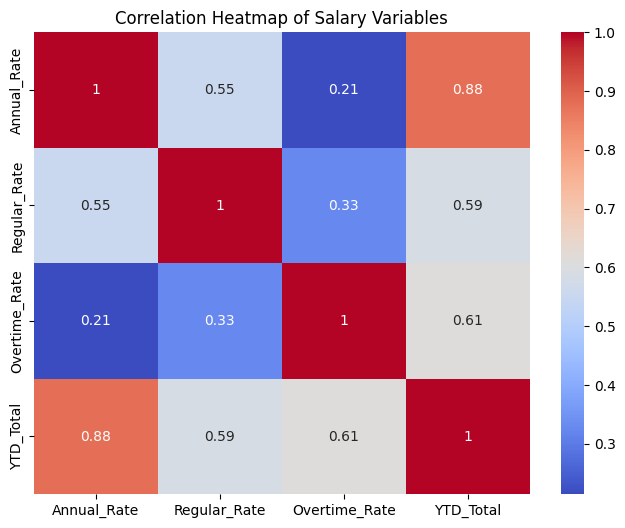

In [25]:
#Multivariate analysis
#Correlation analysis
plt.figure(figsize=(8,6))
corr = df[['Annual_Rate','Regular_Rate','Overtime_Rate','YTD_Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Salary Variables')
plt.show()

# **Observation**


-  The heatmap shows correlations among four salary-related variables: **Annual Rate, Regular Rate, Overtime Rate, and YTD Total.**
- **Annual Rate vs YTD Total** has a strong positive correlation **(0.88)**, indicating that annual salary is a major driver of total year-to-date earnings.

- **Regular Rate vs YTD Total** also shows a moderate correlation **(0.59)**, while **Overtime Rate vs YTD Total** is slightly stronger **(0.61)**.

- **Annual Rate vs Regular Rate** has a moderate correlation **(0.55)**, suggesting alignment but not perfect overlap.

- **Annual Rate vs Overtime Rate** shows a weak correlation **(0.21)**, meaning overtime pay is not strongly tied to base annual salary.

# **Overall Interpretation**

- **The YTD Total** is most influenced by Annual Rate, confirming that base salary is the primary determinant of overall earnings.

- **Overtime Rate** contributes meaningfully to YTD totals, but its weaker correlation with Annual Rate suggests that overtime compensation is distributed unevenly across roles.

- **Regular Rate** aligns moderately with both Annual Rate and YTD Total, reflecting its role as a consistent but secondary factor in overall pay.

- The weak correlation between **Annual Rate and Overtime Rate** highlights that higher-salaried employees do not necessarily earn more through overtime — overtime is likely concentrated in specific operational or emergency roles rather than leadership positions.


# **Mean vs Max Annual Salary by Department (Top 10)**
This line chart compares the mean and maximum annual salaries across the top 10 departments with the highest maximum salaries. The data was grouped by department, calculating both the average (mean) and the highest (max) annual rate for each department. Two lines are plotted to show the difference between typical salaries and top salaries within each department.

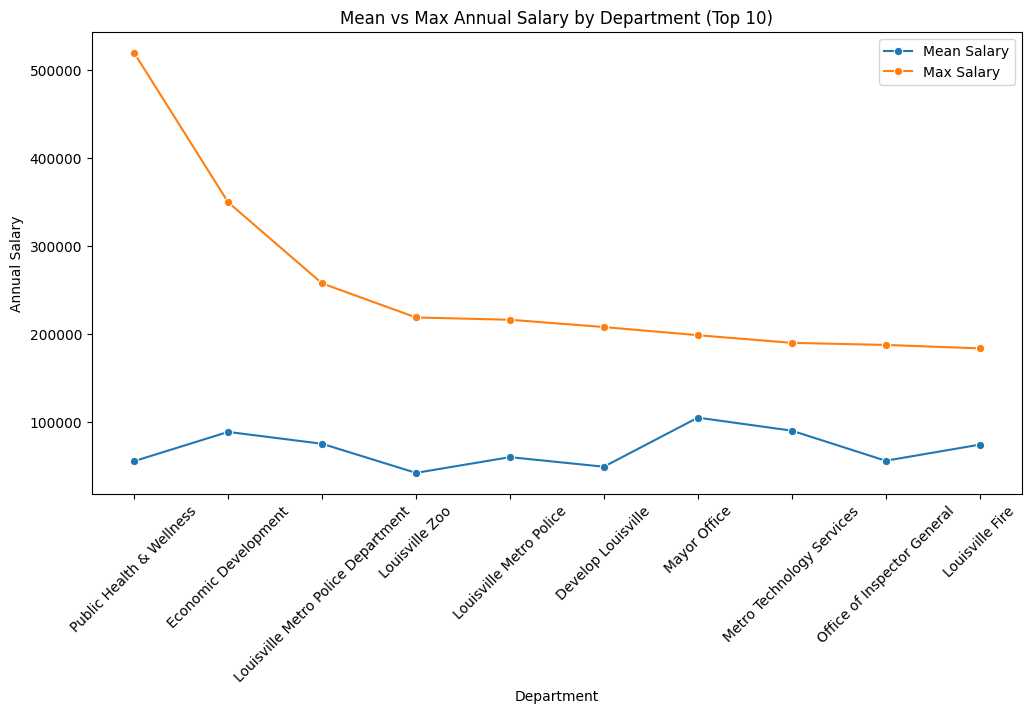

In [26]:
#multivariate
plt.figure(figsize=(12,6))

# Aggregate mean & max salary by department
dept_stats = df.groupby('Department')['Annual_Rate'].agg(['mean','max']).sort_values(by='max', ascending=False).head(10)

# Line plot for mean salary
sns.lineplot(x=dept_stats.index, y=dept_stats['mean'], marker='o', label='Mean Salary')

# Line plot for max salary
sns.lineplot(x=dept_stats.index, y=dept_stats['max'], marker='o', label='Max Salary')

plt.title('Mean vs Max Annual Salary by Department (Top 10)')
plt.xlabel('Department')
plt.ylabel('Annual Salary')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# **Observation**

- **The orange line** **(Max Salary)** shows a steep decline from the highest-paying department, indicating significant disparities in **maximum salaries.**

- **The blue line (Mean Salary)** fluctuates, with a **peak at Economic Development and a dip at Louisville Zoo.**

- Departments like **Public Health & Wellness and Develop Louisville** show moderate mean salaries compared to their maximums.

# **Overall Interpretation**

- The gap between **mean and maximum salaries** highlights **pay disparities within departments.** Some departments have a few very high earners that push the maximum far above the average.

- **Economic Development** shows a high mean salary, suggesting that compensation is more evenly distributed across roles in that department.

- **Louisville Zoo** has a low mean salary compared to its maximum, indicating a wide gap between leadership/executive roles and frontline staff.

- **Public Health & Wellness** and **Develop Louisville** show balanced trends, where mean salaries are closer to maximums, suggesting less disparity.

- **Organizationally, this chart reveals:**

- **Departments with concentrated high salaries** (e.g., Police, Zoo) may face equity concerns.

- **Departments with balanced mean-to-max ratios** (e.g., Economic Development, Public Health) reflect more consistent pay structures.

- These insights are useful for **HR policy reviews**, especially in addressing pay equity and workforce morale




# **Trends in Average YTD and Overtime Rate Over Years**
This figure shows two line plots side by side. The first plot illustrates the trend of average annual salary (Annual_Rate) over the years, while the second plot shows the trend of average overtime rate (Overtime_Rate). Both plots help visualize changes in employee compensation over time

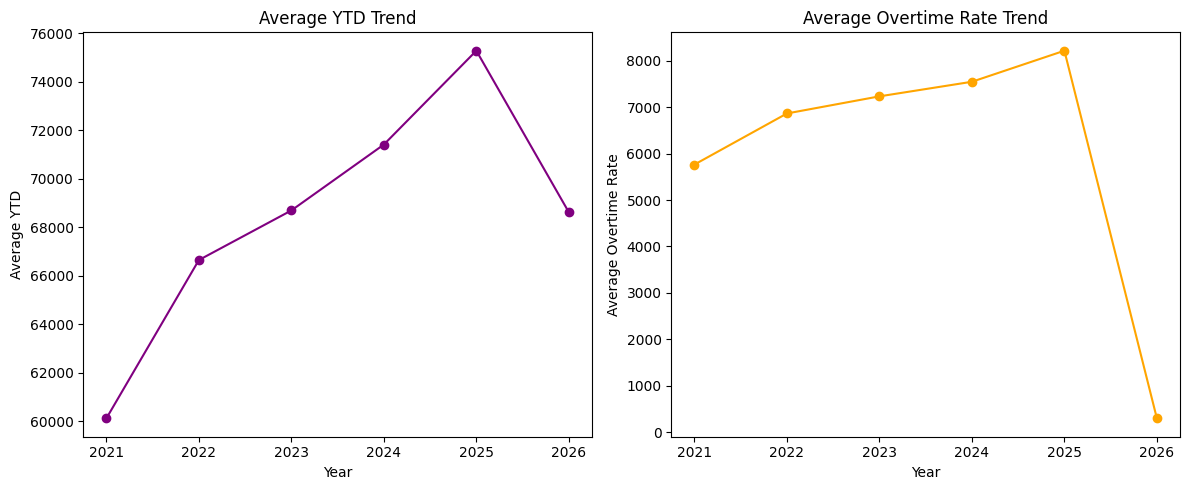

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Line plot: Average YTD_Total per Year
year_avg = df.groupby('CalYear')['YTD_Total'].mean()
axes[0].plot(year_avg.index, year_avg.values, marker='o', color='purple')
axes[0].set_title('Average YTD Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average YTD')

# Line plot: Average Overtime Rate per Year
year_ot = df.groupby('CalYear')['Overtime_Rate'].mean()
axes[1].plot(year_ot.index, year_ot.values, marker='o', color='orange')
axes[1].set_title('Average Overtime Rate Trend')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Overtime Rate')

plt.tight_layout()
plt.show()


# **Observation**
**1. Average YTD Trend**

The average YTD salary shows a steady increase from 2021 to 2025.

The trend rises sharply between 2021 and 2022, indicating significant growth in employee earnings.

The highest average YTD value is reached in 2025.

In 2026, there is a noticeable decline, suggesting reduced salary accumulation or incomplete year-to-date data.

**2.Average Overtime Rate Trend**

The average overtime rate increases consistently from 2021 to 2025.

This indicates that overtime compensation has been rising over the years, possibly due to higher workload or staffing needs.

A sharp drop is observed in 2026, which may reflect:

Reduced overtime usage,

Policy changes,

Or partial/incomplete data for that year.

**Overall Interpretation:**

Both trends suggest that employee earnings and overtime payments have generally grown over time, peaking around 2025.

The steady rise highlights increasing labor demand, overtime dependence, and possibly higher wage adjustments across departments.

The sudden decline in 2026 may not represent an actual reduction but could be due to data availability issues or the year not being fully recorded.

Overall, the organization’s payroll trends indicate that overtime plays a key role in influencing total compensation, contributing significantly to salary variation.

# **Analysis of YTD and Its Relationship with Salary Components**

The figure contains four subplots analyzing the distribution and relationships of YTD_Total (Year‑to‑Date Total) with other salary variables:

- **YTD_Total Distribution (Histogram):**

 Shows how employees’ total year‑to‑date earnings are distributed. Helps identify common earning ranges and the presence of high‑earning outliers.

- **YTD_Total Boxplot:**

 Highlights the spread, median, and outliers in total earnings. Provides insight into variability and extremes across the workforce.

- **YTD_Total vs Annual Salary (Scatter Plot):**

 Displays the relationship between total earnings and annual salary. Each point represents an employee, helping to identify correlations and patterns.

- **YTD_Total vs Overtime Rate (Scatter Plot):**

Illustrates the relationship between total earnings and overtime rate. Useful to see whether higher total earnings correspond to higher overtime compensation.


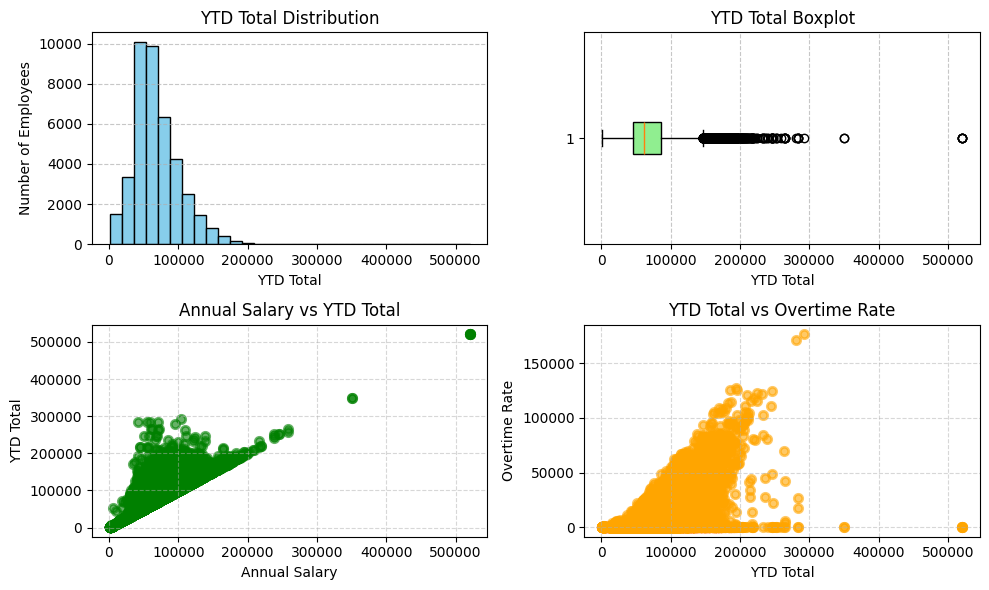

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Subplot 1: YTD Distribution (Histogram)
plt.subplot(2, 2, 1)
plt.hist(df['YTD_Total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('YTD Total')
plt.ylabel('Number of Employees')
plt.title('YTD Total Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Boxplot of YTD Total
plt.subplot(2, 2, 2)
plt.boxplot(df['YTD_Total'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('YTD Total')
plt.title('YTD Total Boxplot')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Subplot 3: Annual Rate vs YTD Total (Scatter)
plt.subplot(2, 2, 3)
plt.scatter(df['Annual_Rate'], df['YTD_Total'], alpha=0.6, color='green',linewidth=2)
plt.xlabel('Annual Salary')
plt.ylabel('YTD Total')
plt.title('Annual Salary vs YTD Total')
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 4: YTD Total vs Overtime Rate (Scatter)
plt.subplot(2, 2, 4)
plt.scatter(df['YTD_Total'], df['Overtime_Rate'], alpha=0.6, color='orange',linewidth=2)
plt.xlabel('YTD Total')
plt.ylabel('Overtime Rate')
plt.title('YTD Total vs Overtime Rate')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# **Observation**
**The visualizations highlight different aspects of employee compensation:**

  - **Histogram (YTD_Total):**

     Shows how year‑to‑date earnings are distributed across employees. Most employees cluster around typical earning ranges, while a few outliers earn significantly more.

  - **Box Plot (YTD_Total):**

     Confirms the spread and presence of outliers. The median line and quartiles illustrate central tendency, while extreme values point to executives or specialized roles.

  - **Scatter Plot (Annual_Rate vs YTD_Total):**

     Displays a strong positive relationship, meaning higher annual salaries consistently lead to higher year‑to‑date totals. The close alignment of points reinforces base salary as the dominant driver of total earnings.

  - **Scatter Plot (YTD_Total vs Overtime Rate):**

     Shows a weaker correlation. While overtime contributes to total earnings, it does not scale proportionally with base salary. Instead, overtime depends more on role type and operational needs.

# **Overall Interpretation**

  **Together, these charts provide a comprehensive view of compensation dynamics:**

  - **Base Salary Stability:**

     Annual salary is the most reliable predictor of total earnings, ensuring predictable growth across the workforce.

  - **Outliers & Inequality:**

     The histogram and box plot reveal widening gaps, with a small group of employees earning disproportionately high totals.

  - **Overtime Sensitivity:** Overtime pay adds variability but is not  uniformly distributed, reflecting workload differences and departmental policies.
In essence, the data shows that salary growth is systematic and policy‑driven, while overtime compensation is situational and uneven, leading to diverse outcomes in overall pay distribution
